# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [41]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [42]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

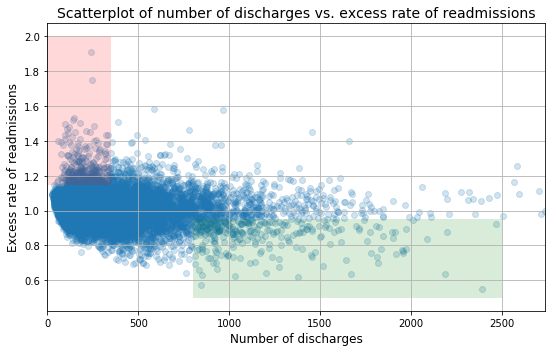

In [43]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [44]:
# Your turn

A. I do not believe there is enough information presented above for me to say whether or not I agree with the conclusions. I do not agree that these conclusions can be drawn given the analysis performed. There is no hypothesis test performed and a p-value or confidence interval would add to the validity of the conclusions. 

I cannot say from this information if the recommendations are good. The recommendation that small hospitals with a capacity <300 should be required to demonstrate resource allocation for quality care is not well based on anything in the data. The choice of a capacity of <300 is arbitrary given the analysis. Additionally, from the way the data is presented I cannot say if targeting all small hospitals is a good idea. 

B. I will test the null hypothesis that there is no difference between the readmittance rate for small and large hospitals. The alternative hypothesis is that there is a difference in readmittance rate for small and large hospitals. 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(3791)

#method to use thoughout the exercise 
# From the datacamp statistical thinking in python exercises
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [46]:
#null hypothesis: ERR_big = ERR_small
#make dataframes for big and small hospitals
low_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <= 100]
high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 100]

low_discharge = low_discharge.dropna(subset=['Excess Readmission Ratio'])
high_discharge = high_discharge.dropna(subset=['Excess Readmission Ratio'])

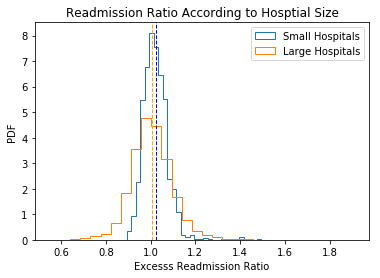

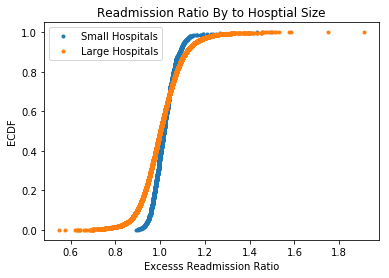

In [47]:
#Perform EDA with a histogram and ECDF

low_mean = np.mean(low_discharge['Excess Readmission Ratio'])
high_mean = np.mean(high_discharge['Excess Readmission Ratio'])


x_low, y_low = ecdf(low_discharge['Excess Readmission Ratio'])
x_high, y_high = ecdf(high_discharge['Excess Readmission Ratio'])

# Examine differences visually
plt.hist(low_discharge['Excess Readmission Ratio'], bins=30, normed=True, histtype='step', label='Small Hospitals')
plt.hist(high_discharge['Excess Readmission Ratio'], bins=30, normed=True, histtype='step', label='Large Hospitals')
plt.axvline(np.mean(low_discharge['Excess Readmission Ratio']), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(high_discharge['Excess Readmission Ratio']), color='orange', linestyle='dashed', linewidth=1)

plt.xlabel('Excesss Readmission Ratio')
plt.ylabel('PDF')
plt.title('Readmission Ratio According to Hosptial Size')
plt.legend()
plt.show()

plt.plot(x_low, y_low, marker='.', linestyle='none', label='Small Hospitals')
plt.plot(x_high, y_high, marker='.', linestyle='none',label='Large Hospitals')
plt.ylabel('ECDF')
plt.xlabel('Excesss Readmission Ratio')
plt.title('Readmission Ratio By to Hosptial Size')
plt.legend()
plt.show()


From this small amount of EDA, it appears that there is a difference in the distributions of excess readmission ratios for large and small hospitals. Both distributions appear to be normal. However, smaller hopsitals have a slightly highter excess readmission ratio by visual inspection and a smaller standard deviation.

The mean difference in readmittance ratio between small and large hospitals is 0.01632
95% confidence interval = 0.01264, 0.02009: difference in readmittance ratio


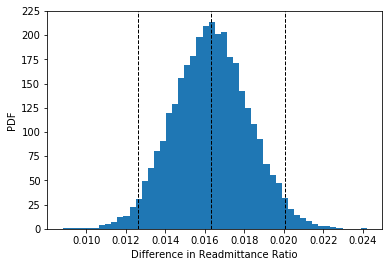

p =  0.0
The p value of 0.0 suggests that the null hypothesis should be rejected.


In [48]:
#make arrays from the excess readmission ratios of high and low
low_readmit = np.array(low_discharge['Excess Readmission Ratio'])
high_readmit = np.array(high_discharge['Excess Readmission Ratio'])

#draw bs_replicates from both samples and take their difference
#to find the difference of the averages of these samples
bs_replicates_l = draw_bs_reps(low_readmit, np.mean, 10000)
bs_replicates_h = draw_bs_reps(high_readmit, np.mean, 10000)
bs_replicates = bs_replicates_l - bs_replicates_h

#calculate the confidence intervals
conf_int = np.percentile(bs_replicates, [2.5,97.5])

print('The mean difference in readmittance ratio between small and large hospitals is {:.5f}'.format(np.mean(bs_replicates)))
print('95% confidence interval = {:.5f}, {:.5f}: difference in readmittance ratio'.format(conf_int[0], conf_int[1]))

# Plot the histogram of the replicates, the mean, and the 95% confidence interval
plt.hist(bs_replicates, bins=50, normed=True)
plt.axvline(np.mean(bs_replicates), color='k', linestyle='dashed', linewidth=1)
plt.axvline(conf_int[0], color='k', linestyle='dashed', linewidth=1)
plt.axvline(conf_int[1], color='k', linestyle='dashed', linewidth=1)

plt.xlabel('Difference in Readmittance Ratio')
plt.ylabel('PDF')

plt.show()


#Find the p-value, assuming the null hypothesis that the difference in means is 0
mean = np.mean(low_readmit) - np.mean(high_readmit)
std = np.sqrt(np.std(low_readmit)**2 - np.std(high_readmit)**2)

low_shifted = low_readmit + mean - np.mean(low_readmit)
high_shifted = high_readmit + mean - np.mean(high_readmit)

bs_replicates_l = draw_bs_reps(low_shifted, np.mean, 10000)
bs_replicates_h = draw_bs_reps(high_shifted, np.mean, 10000)
bs_replicates = bs_replicates_l - bs_replicates_h

p = np.sum(bs_replicates >= mean) / 10000

print('p = ', p)
print('The p value of {} suggests that the null hypothesis should be rejected.'.format(p))

The p-value generated using bootstrapping is 0. For 10000 trials, this corresponds to a p-value of less than 1$\times$10$^{-4}$. Therefore, the null hypothesis can be rejected.

3. As stated above, the p-value is less than 1$\times$10$^{-4}$, which is therefore statistically significant for $\alpha$=0.01

4. This data shows that there is a statistically significant average difference between the readmittance ratio between small and large hospitals. There is a 95% chance that smaller hospitals have a difference in readmittance ratio between 1.2% and 2%. Without more data, like the funding for each hospital, the number of staff per patient, etc, it is difficult to make any sure statements about what is causing this difference. My practical suggestion would be to gather more data on what could be causing this difference, targeting variables like amount of money and number of staff per patient that may be different for smaller vs. larger hospitals.

5. The scatter plot from the original analysis has a few advantages. All of the data is displayed, and it shows that this small correlation between hospital size and readmittance ratio might exist.

However, there are many disadvantages to the scatter plot. The relationship between the size of the hospital and the readmittance ratio is difficult to see by eye and the shaded areas only appear to be pointing out outliers. Overall, it does not do a good job at demonstrating the entire trend.

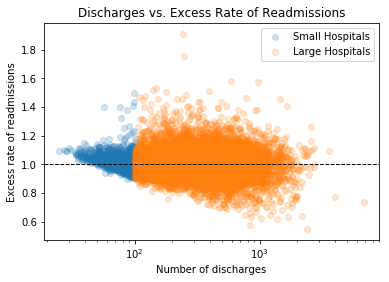

In [49]:
x_low = [a for a in low_discharge['Number of Discharges']]
y_low = list(low_discharge['Excess Readmission Ratio'])

x_high = [a for a in high_discharge['Number of Discharges']]
y_high = list(high_discharge['Excess Readmission Ratio'])

plt.scatter(x_low, y_low, alpha=0.2, label ='Small Hospitals' )
plt.scatter(x_high, y_high, alpha=0.2, label='Large Hospitals')
plt.axhline(1, color='k', linestyle='dashed', linewidth=1)

plt.xscale('log')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Discharges vs. Excess Rate of Readmissions')
plt.legend()

By using a log scale, all of the hospitals are included and the smallest hospitals can still be seen on the graph. Additionally, drawing a line at 1 for the excess rate of readmissions helps the eye see the trends of the plot. Finally, plotting the large and small hospitals with different colors helps the eye distinguish visually between the two categories being examined. 